In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("../input/xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [5]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

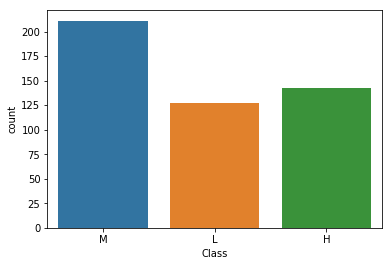

In [6]:
sns.countplot(df.Class)

In [7]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

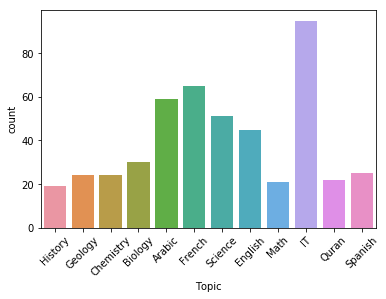

In [8]:
sns.countplot(df.Topic.sort_index(ascending=False))
plt.xticks(rotation=45)

In [9]:
pd.crosstab(df['Class'],df['Topic'])

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,19,16,10,17,20,6,4,15,6,8,16,5
L,17,4,8,10,16,0,3,38,7,6,10,8
M,23,10,6,18,29,18,12,42,8,8,25,12


In [10]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

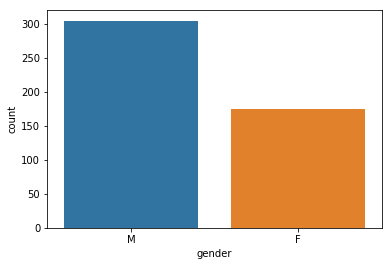

In [11]:
sns.countplot(df.gender)

In [12]:
df.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Lybia            6
Iran             6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

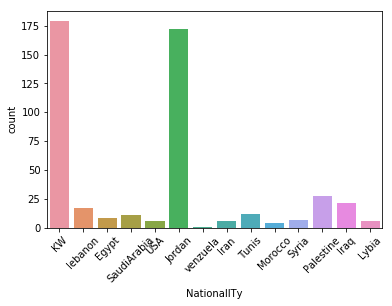

In [13]:
sns.countplot(df.NationalITy)
plt.xticks(rotation=45)

In [14]:
print(df.dtypes)

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


In [15]:
label=LabelEncoder()

In [16]:
gender=label.fit_transform(df['gender'])
Nationality=label.fit_transform(df['NationalITy'])
PlaceOfBirth=label.fit_transform(df['PlaceofBirth'])
StageID=label.fit_transform(df['StageID'])
GradeID=label.fit_transform(df['GradeID'])
SectionID=label.fit_transform(df['SectionID'])
Topic=label.fit_transform(df['Topic'])
Semester=label.fit_transform(df['Semester'])
Relation=label.fit_transform(df['Relation'])
ParentAnsweringSurvey=label.fit_transform(df['ParentAnsweringSurvey'])
ParentschoolSatisfaction=label.fit_transform(df['ParentschoolSatisfaction'])
StudentAbsenceDays=label.fit_transform(df['StudentAbsenceDays'])
Class=label.fit_transform(df['Class'])

In [17]:
df.drop(['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic',
         'Semester','Relation','ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class'],
       axis=1,inplace=True)

In [18]:
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [19]:
df['gender']=gender
df['NationalITy']=Nationality
df['PlaceofBirth']=PlaceOfBirth
df['StageID']=StageID
df['GradeID']=GradeID
df['SectionID']=SectionID
df['Topic']=Topic
df['Semester']=Semester
df['Relation']=Relation
df['ParentAnsweringSurvey']=ParentAnsweringSurvey
df['ParentschoolSatisfaction']=ParentschoolSatisfaction
df['StudentAbsenceDays']=StudentAbsenceDays
df['Class']=Class

In [20]:
df.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1,2
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1,2
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0,1
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0,1
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0,2


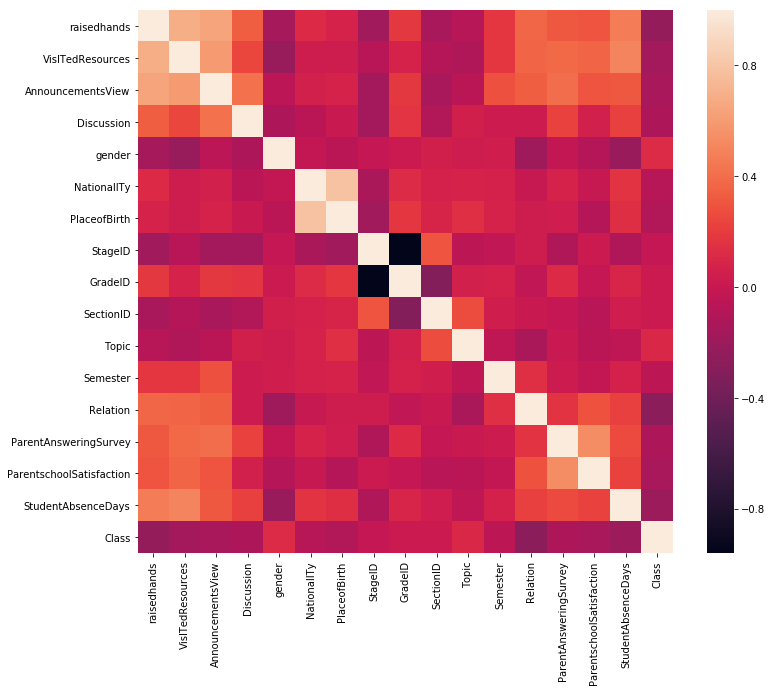

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:',end='')
print(metrics.accuracy_score(y_test,y_pred))
acc_before_scaling=metrics.accuracy_score(y_test,y_pred)

Accuracy Score:0.4895833333333333


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [26]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train_std,y_train)
y_pred=svc.predict(X_test_std)
print('Accuracy Score:',end='')
print(metrics.accuracy_score(y_test,y_pred))
acc_after_scaling=metrics.accuracy_score(y_test,y_pred)

Accuracy Score:0.8229166666666666


In [27]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        26
           1       0.89      1.00      0.94        25
           2       0.83      0.78      0.80        45

   micro avg       0.82      0.82      0.82        96
   macro avg       0.82      0.84      0.83        96
weighted avg       0.82      0.82      0.82        96



### Linear SVC

In [28]:
svm = SVC(kernel='linear', C=2.0, random_state=0)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 23


In [29]:
print('Accuracy: %.2f' %metrics.accuracy_score(y_test, y_pred))
acc_linear_svc=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.76


In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        26
           1       0.88      0.92      0.90        25
           2       0.79      0.67      0.72        45

   micro avg       0.76      0.76      0.76        96
   macro avg       0.77      0.79      0.77        96
weighted avg       0.77      0.76      0.76        96



## Non-linear SVC with rbf

In [31]:
svm = SVC(kernel='rbf', random_state=0, gamma=2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 47


In [32]:
print('Accuracy: %.2f' %metrics.accuracy_score(y_test, y_pred))
acc_svc_circular_rbf=metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.51


In [33]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        26
           1       1.00      0.16      0.28        25
           2       0.49      0.98      0.65        45

   micro avg       0.51      0.51      0.51        96
   macro avg       0.66      0.39      0.33        96
weighted avg       0.62      0.51      0.40        96



In [34]:
models = pd.DataFrame({
    'Model': ['SVM Before Scaling', 'SVM After Scaling', 'SVC Linear', 
              'SVC Circular'],
    'Score': [acc_before_scaling, acc_after_scaling, acc_linear_svc, 
              acc_svc_circular_rbf]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM After Scaling,0.822917
2,SVC Linear,0.760417
3,SVC Circular,0.510417
0,SVM Before Scaling,0.489583
